# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.integrate import solve_ivp

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

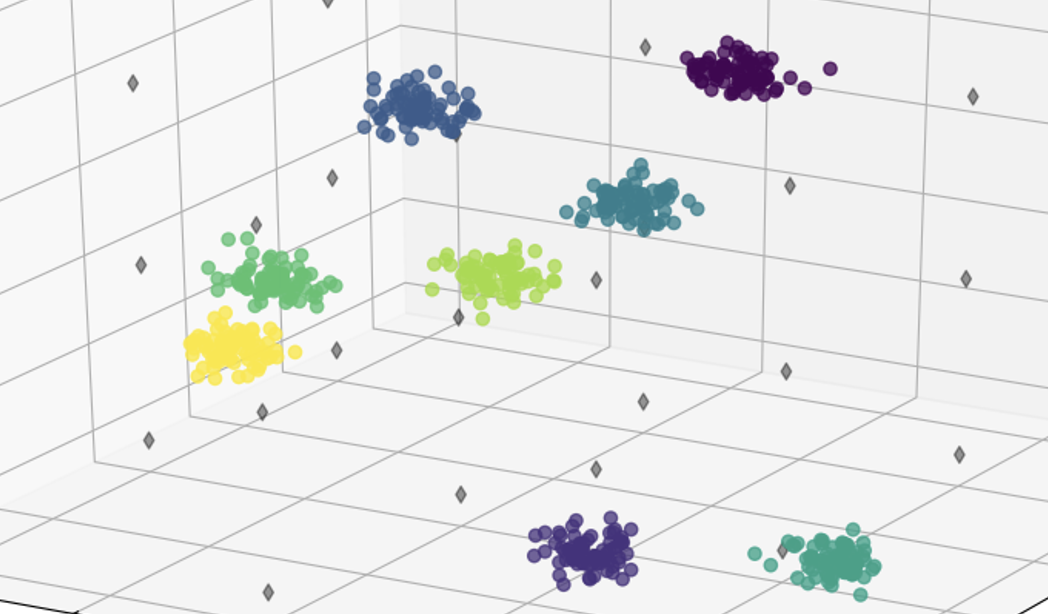

In [160]:
centroids = [[2, 2], [8, 8]]
samples = 1000
cluster_noise = 1.0

X, y = make_blobs(n_samples=samples, centers=centroids, cluster_std=cluster_noise, n_features=2, random_state=42)

test_df1 = pd.DataFrame(data=X, columns=["x", "y"])
test_df1["class"] = y

In [161]:
csv_path = "./sklearn_dataset.csv"
test_df1.to_csv(csv_path, index=False)

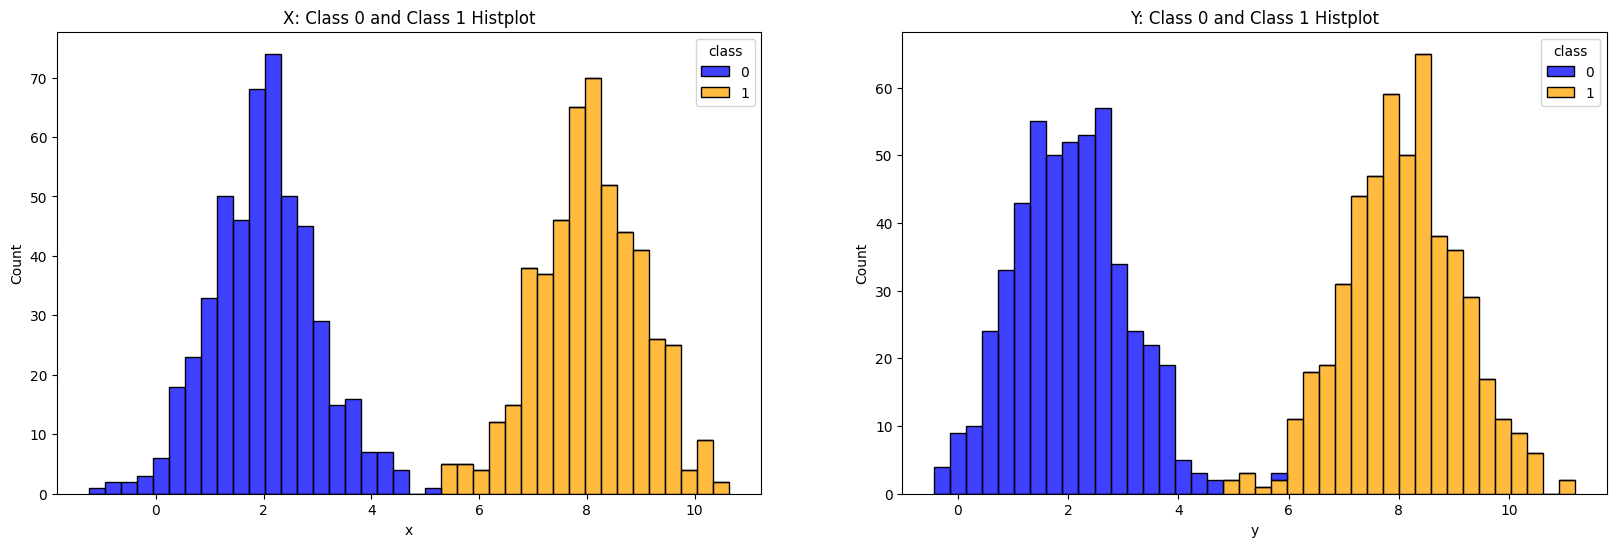

'./sklearn_dataset.csv'

In [162]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=test_df1, x="x", ax=ax1, hue="class", palette=["blue", "orange"], bins=40, multiple="stack")
ax1.set_title("X: Class 0 and Class 1 Histplot")

sns.histplot(data=test_df1, x="y", ax=ax2, hue="class", palette=["blue", "orange"], bins=40, multiple="stack")
ax2.set_title("Y: Class 0 and Class 1 Histplot")

plt.show()

csv_path

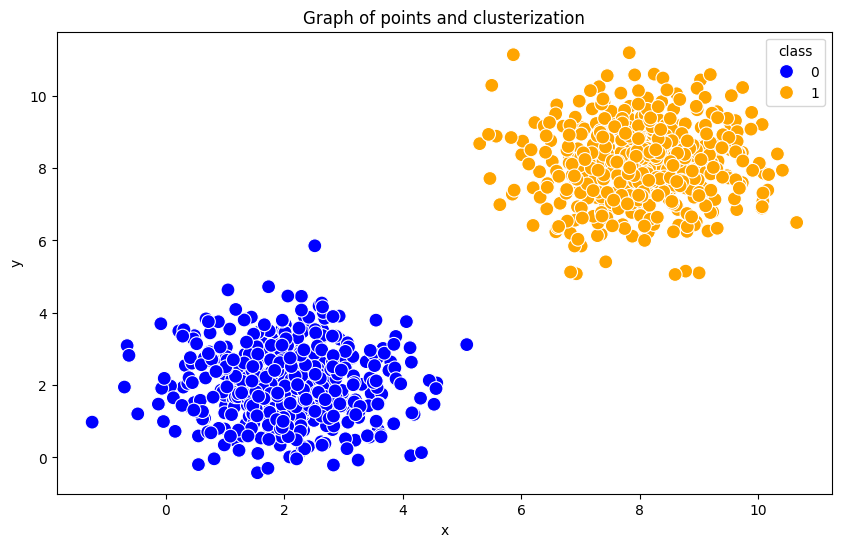

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.scatterplot(data=test_df1, x="x", y="y", hue="class", palette=["blue", "orange"], ax=ax, legend="full", s=100)

ax.set_title("Graph of points and clusterization")

plt.show()

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

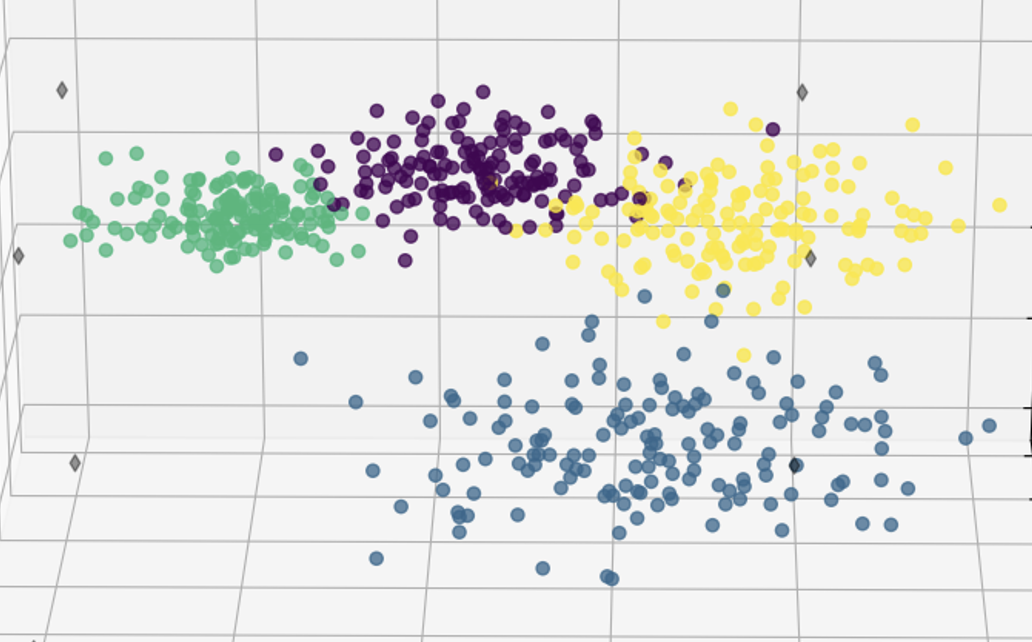

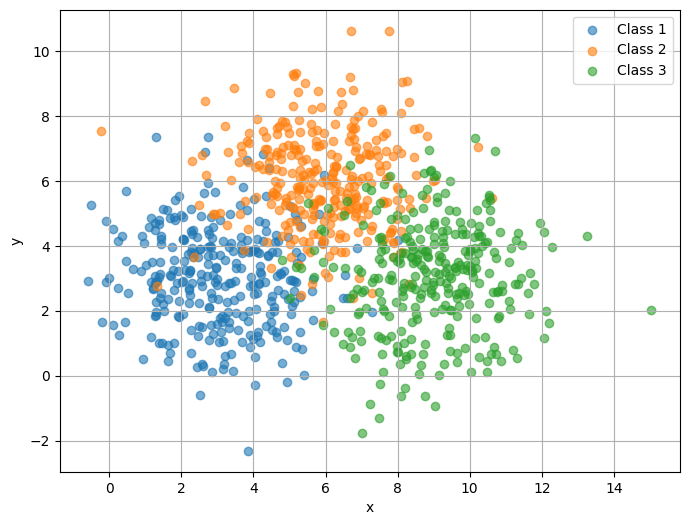

In [164]:
center_data_class1 = np.array([3, 3])
center_data_class2 = np.array([6, 6])
center_data_class3 = np.array([9, 3])

num_points = 300
spread = 1.5

In [165]:
x1 = np.random.normal(center_data_class1[0], spread, num_points)
y1 = np.random.normal(center_data_class1[1], spread, num_points)
class1 = np.ones(num_points)

x2 = np.random.normal(center_data_class2[0], spread, num_points)
y2 = np.random.normal(center_data_class2[1], spread, num_points)
class2 = np.ones(num_points) * 2

x3 = np.random.normal(center_data_class3[0], spread, num_points)
y3 = np.random.normal(center_data_class3[1], spread, num_points)
class3 = np.ones(num_points) * 3

In [166]:
df = pd.DataFrame({
    'x': np.concatenate([x1, x2, x3]),
    'y': np.concatenate([y1, y2, y3]),
    'class': np.concatenate([class1, class2, class3])
})

df.to_csv('classes.csv', index=False)

In [167]:
plt.figure(figsize=(8, 6))

plt.scatter(x1, y1, label='Class 1', alpha=0.6)
plt.scatter(x2, y2, label='Class 2', alpha=0.6)
plt.scatter(x3, y3, label='Class 3', alpha=0.6)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

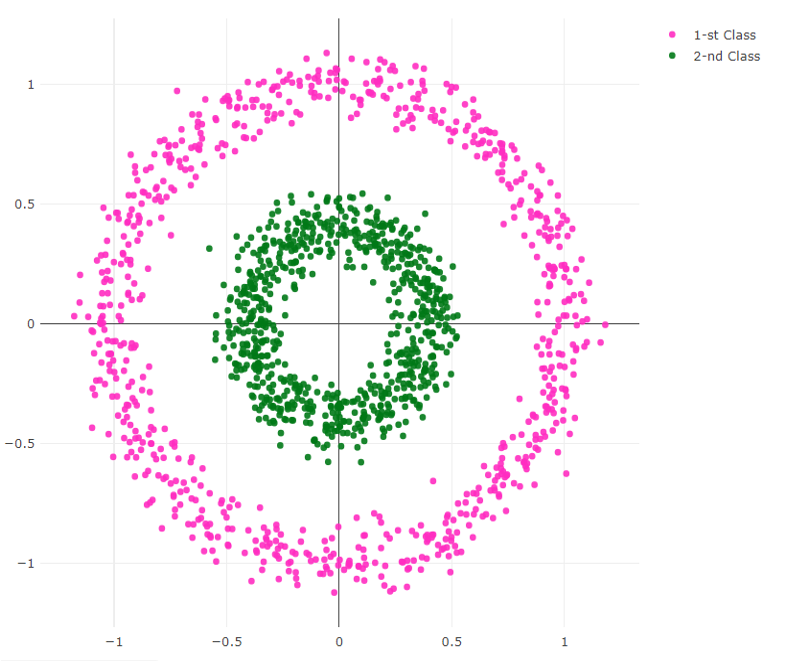

In [168]:
n_samples = 500
noise = 0.1

inner_radius = 2
inner_thickness = 0.3

outer_radius = 4
outer_thickness = 0.5

In [169]:
def generate_torus_data(n, radius, thickness, noise_level, label):
    theta = 2 * np.pi * np.random.rand(n) 
    r = radius + thickness * (np.random.rand(n) - 0.5)  
    x = r * np.cos(theta) + noise_level * np.random.randn(n) 
    y = r * np.sin(theta) + noise_level * np.random.randn(n)  
    labels = np.full(n, label)
    return x, y, labels

x_inner, y_inner, labels_inner = generate_torus_data(n_samples, inner_radius, inner_thickness, noise, 1)

x_outer, y_outer, labels_outer = generate_torus_data(n_samples, outer_radius, outer_thickness, noise, 2)


x_total = np.concatenate([x_inner, x_outer])
y_total = np.concatenate([y_inner, y_outer])
labels_total = np.concatenate([labels_inner, labels_outer])

In [170]:
data = pd.DataFrame({'x': x_total, 'y': y_total, 'class': labels_total})
data.to_csv('./torus_data.csv', index=False)

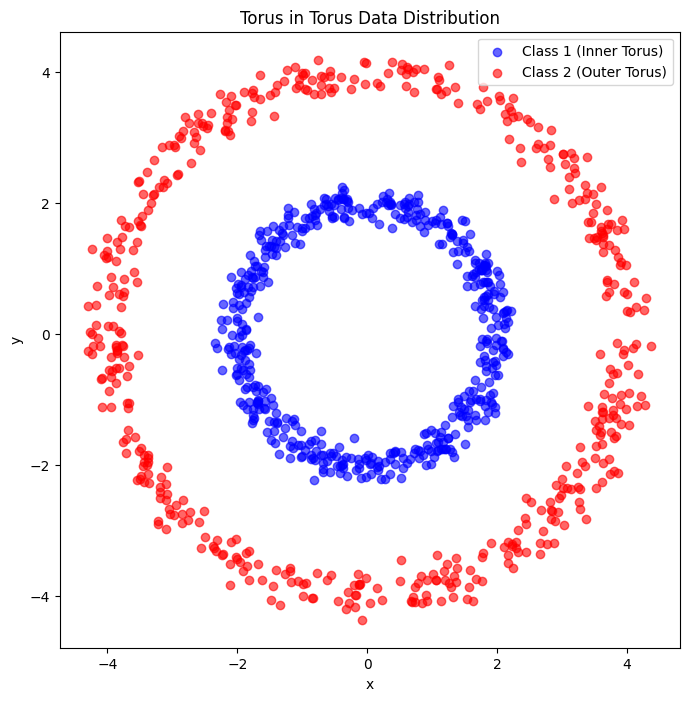

In [171]:
plt.figure(figsize=(8, 8))

plt.scatter(x_inner, y_inner, c='blue', label='Class 1 (Inner Torus)', alpha=0.6)
plt.scatter(x_outer, y_outer, c='red', label='Class 2 (Outer Torus)', alpha=0.6)

plt.title("Torus in Torus Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

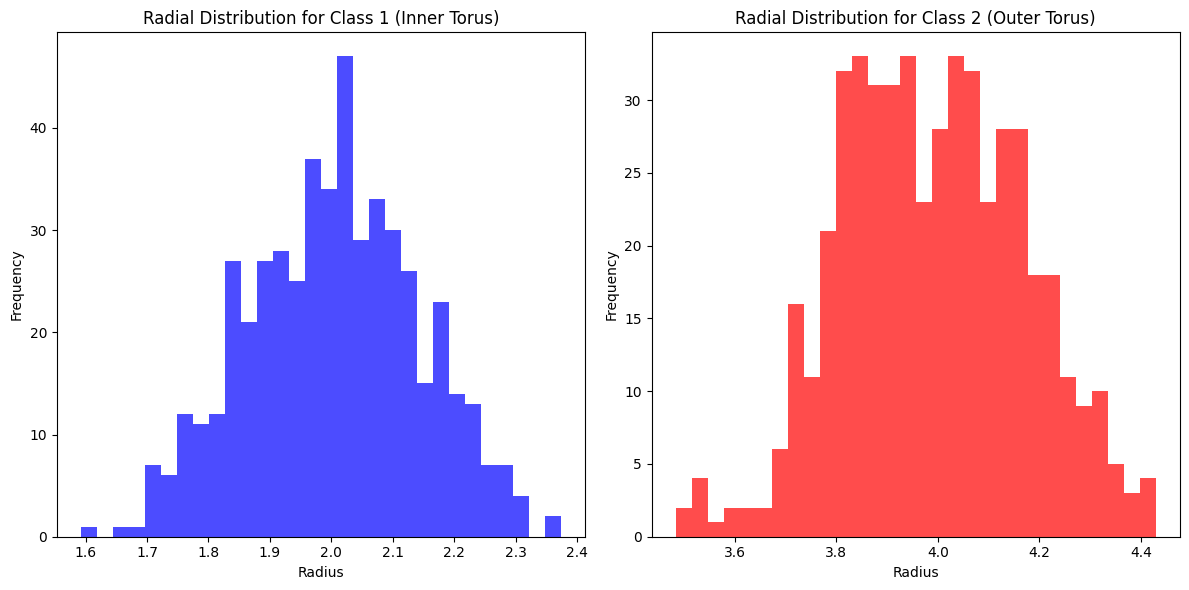

In [172]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(np.sqrt(x_inner**2 + y_inner**2), bins=30, color='blue', alpha=0.7)
plt.title("Radial Distribution for Class 1 (Inner Torus)")
plt.xlabel("Radius")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(np.sqrt(x_outer**2 + y_outer**2), bins=30, color='red', alpha=0.7)
plt.title("Radial Distribution for Class 2 (Outer Torus)")
plt.xlabel("Radius")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

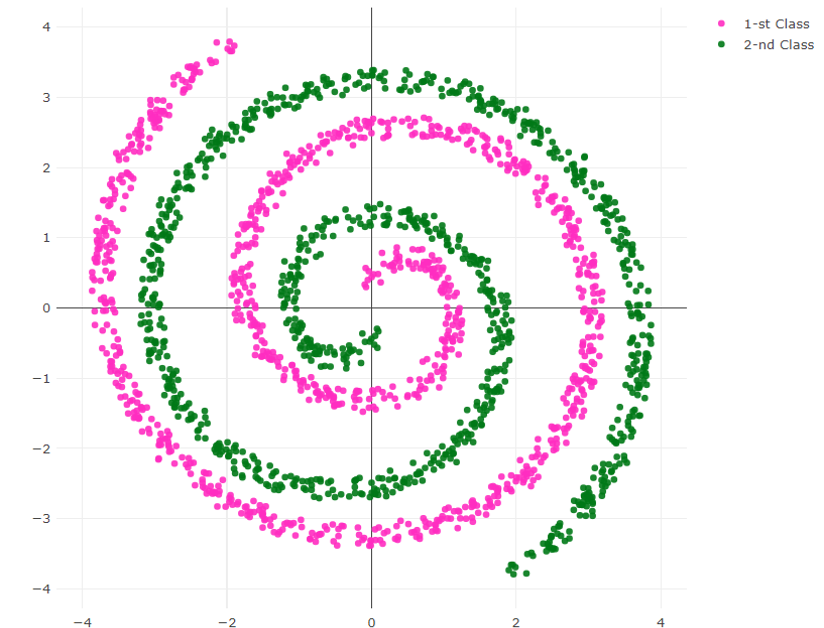

In [173]:
samples = 500
noise = 0.1
num_turns = 3  

In [174]:
def generate_spiral_data(n, turns, noise_level, label, clockwise=True):
    theta = np.linspace(0, 2 * np.pi * turns, n)  # Angle parameter
    r = np.linspace(0, 5, n)  # Radius grows linearly
    if clockwise:
        x = r * np.cos(theta) + noise_level * np.random.randn(n)  # X coordinates with noise
        y = r * np.sin(theta) + noise_level * np.random.randn(n)  # Y coordinates with noise
    else:
        x = r * np.cos(-theta) + noise_level * np.random.randn(n)  # Counterclockwise
        y = r * np.sin(-theta) + noise_level * np.random.randn(n)
    labels = np.full(n, label)
    return x, y, labels

In [175]:
x_spiral1, y_spiral1, labels_spiral1 = generate_spiral_data(n_samples, num_turns, noise, 1, clockwise=True)

x_spiral2, y_spiral2, labels_spiral2 = generate_spiral_data(n_samples, num_turns, noise, 2, clockwise=False)

x_total_spirals = np.concatenate([x_spiral1, x_spiral2])
y_total_spirals = np.concatenate([y_spiral1, y_spiral2])
labels_total_spirals = np.concatenate([labels_spiral1, labels_spiral2])

In [176]:
spiral_data = pd.DataFrame({'x': x_total_spirals, 'y': y_total_spirals, 'class': labels_total_spirals})
spiral_data.to_csv('./spiral_data.csv', index=False)

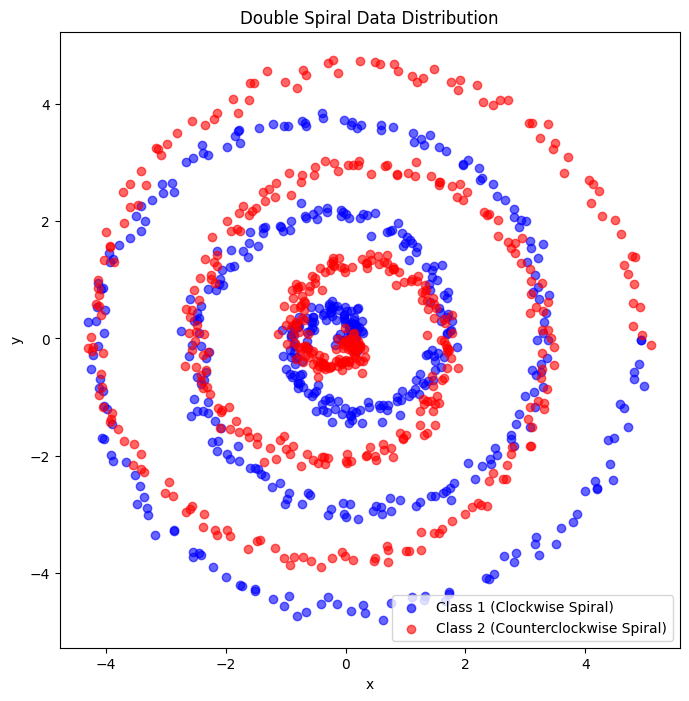

In [177]:
plt.figure(figsize=(8, 8))

plt.scatter(x_spiral1, y_spiral1, c='blue', label='Class 1 (Clockwise Spiral)', alpha=0.6)
plt.scatter(x_spiral2, y_spiral2, c='red', label='Class 2 (Counterclockwise Spiral)', alpha=0.6)
plt.title("Double Spiral Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

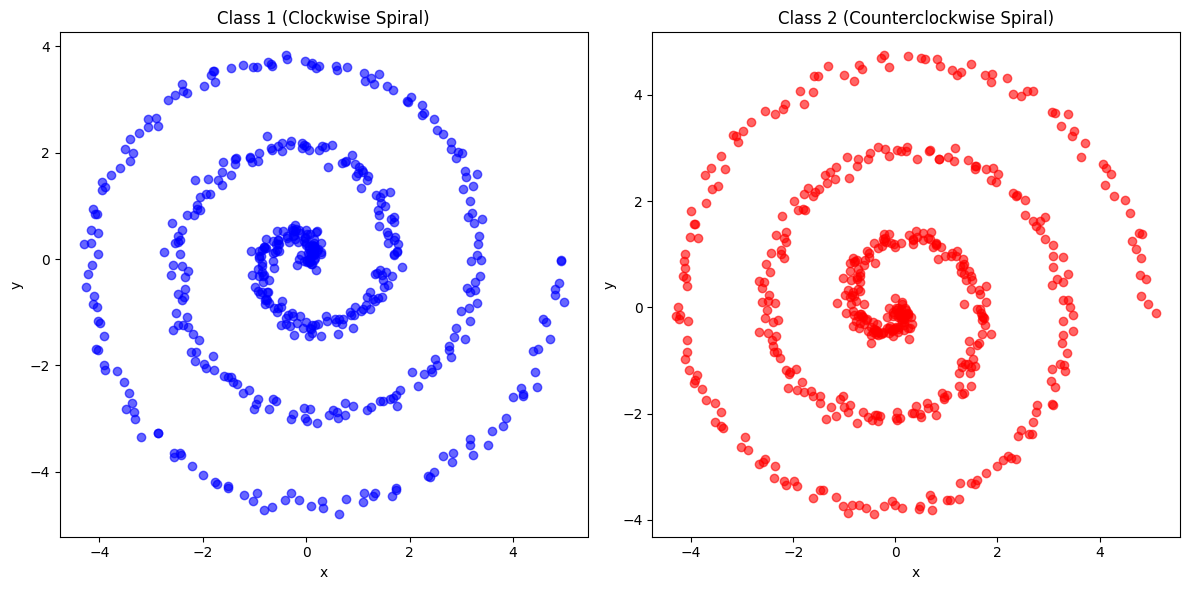

In [178]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_spiral1, y_spiral1, c='blue', alpha=0.6)
plt.title("Class 1 (Clockwise Spiral)")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.scatter(x_spiral2, y_spiral2, c='red', alpha=0.6)
plt.title("Class 2 (Counterclockwise Spiral)")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

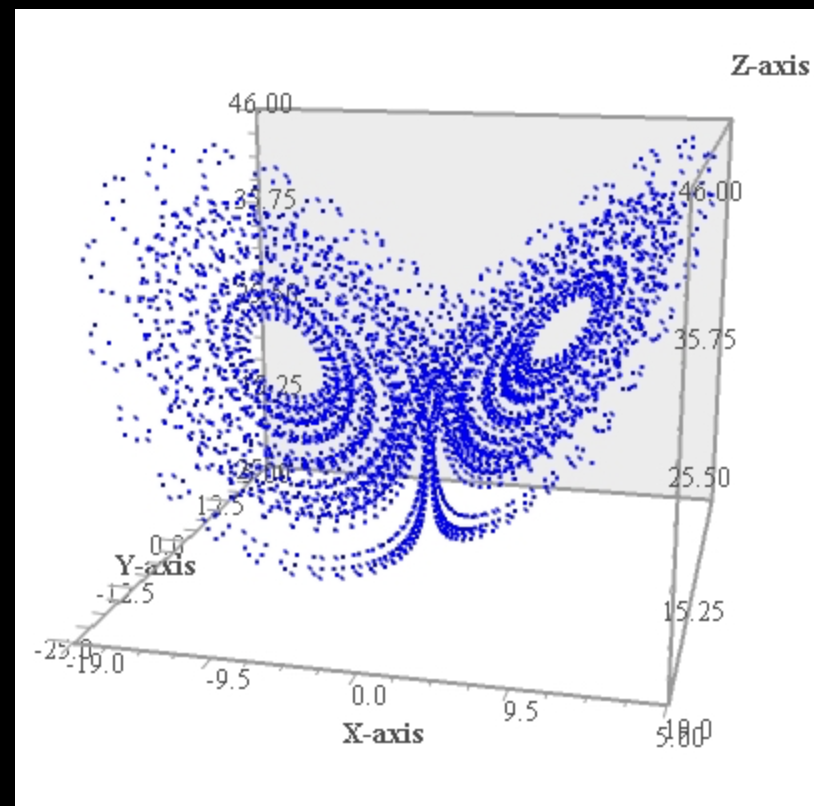

In [179]:
def lorenz_system(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [180]:
initial_state = [1.0, 1.0, 1.0]
t_span = (0, 50)  
t_eval = np.linspace(0, 50, 10000) 

parameter_sets = [
    (10, 28, 8/3),   
    (14, 40, 4),     
    (8, 22, 2.5)   
]

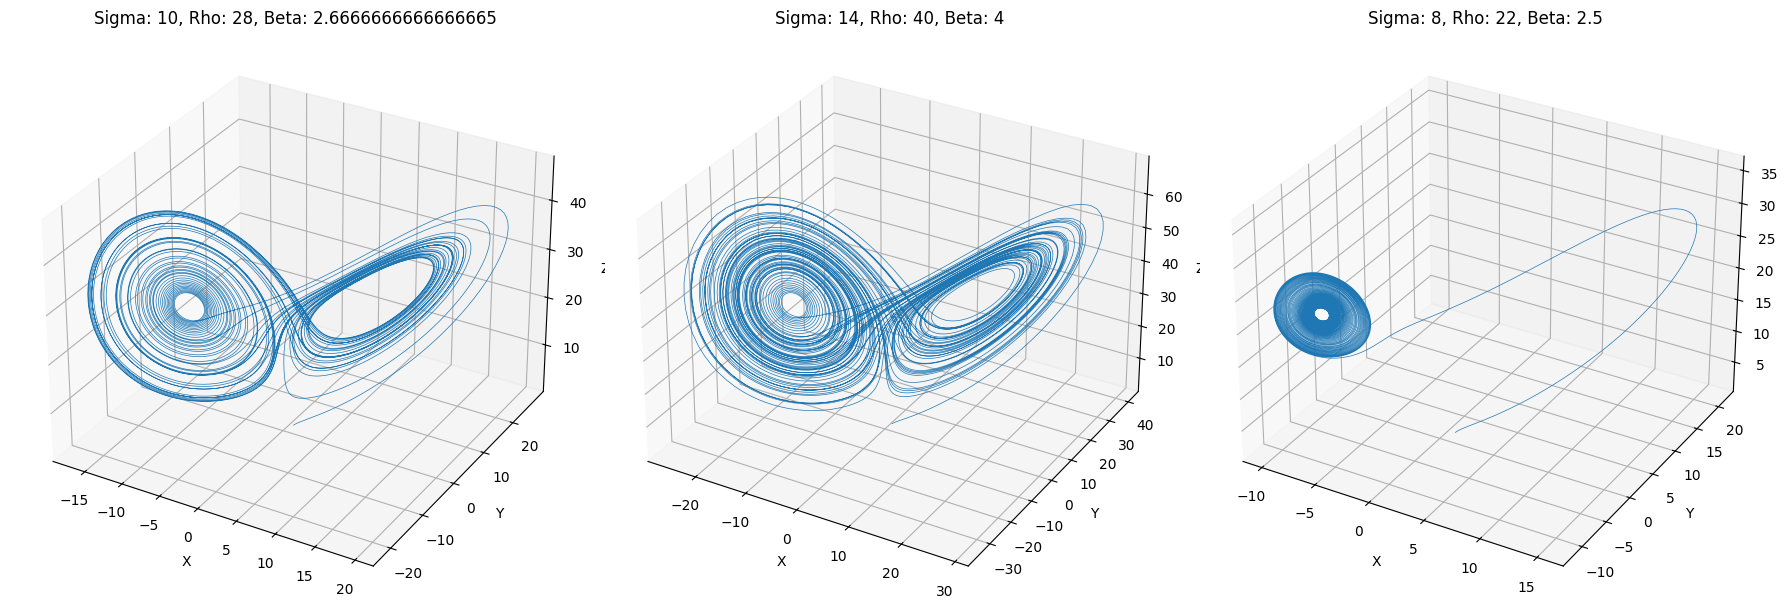

In [181]:
trajectories = []
for sigma, rho, beta in parameter_sets:
    sol = solve_ivp(lorenz_system, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval)
    trajectories.append(sol.y)

fig = plt.figure(figsize=(18, 6))

for i, trajectory in enumerate(trajectories):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.plot(trajectory[0], trajectory[1], trajectory[2], lw=0.5)
    ax.set_title(f'Sigma: {parameter_sets[i][0]}, Rho: {parameter_sets[i][1]}, Beta: {parameter_sets[i][2]}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.tight_layout()
plt.show()